In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-09.SALT.nc')
plotvar = data.variables['SALT'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']
lont1 = lont[224:343,600:1400]
latt1 = latt[224:343,600:1400]
#########121-09

In [3]:
latt1[:,0]

masked_array(data=[-69.00621499, -68.96395318, -68.92169136, -68.87942955,
                   -68.83716774, -68.79490592, -68.75264411, -68.71038229,
                   -68.66812048, -68.62585866, -68.58359685, -68.54133504,
                   -68.49907322, -68.45681141, -68.41454959, -68.37228778,
                   -68.33002596, -68.28776415, -68.24550233, -68.20324052,
                   -68.16097871, -68.11871689, -68.07645508, -68.03419326,
                   -67.99193145, -67.94966963, -67.90740782, -67.865146  ,
                   -67.82288419, -67.78062237, -67.73836056, -67.69609874,
                   -67.65383693, -67.61157512, -67.5693133 , -67.52705149,
                   -67.48478967, -67.44252786, -67.40026604, -67.35800423,
                   -67.31574241, -67.2734806 , -67.23121878, -67.18895697,
                   -67.14669515, -67.10443334, -67.06217152, -67.01990971,
                   -66.97764789, -66.93538608, -66.89312426, -66.85086245,
                   -66.80

In [4]:
lont = lont[:,:]
latt = latt[:,:]
plotvar = plotvar[15,:,:]
plotvar[plotvar == -1000.0] = np.nan
#plotvar = (plotvar - 1)*1000

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: No contour levels were found within the data range.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


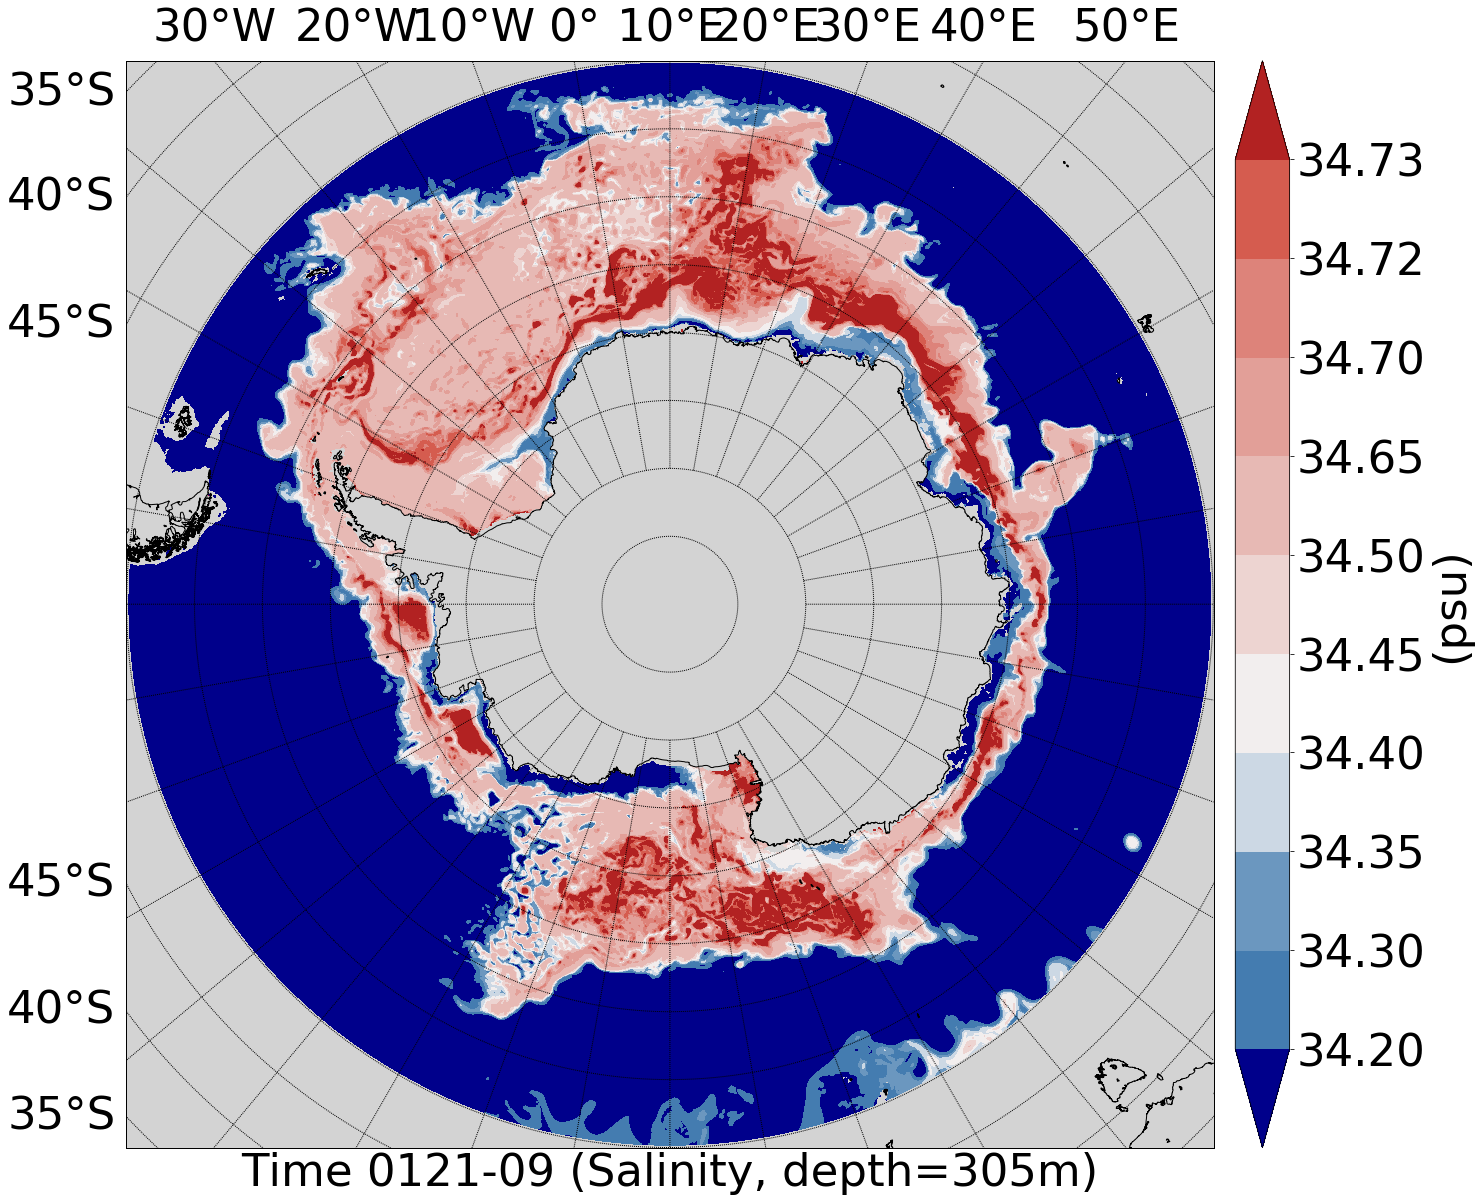

In [5]:
#####################################################################
nice_cmap=sns.diverging_palette(245, 15, n=11,as_cmap=True)
lev_cmap = nice_cmap([1,30,100,130,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [34.20,34.30,34.35,34.40,34.45,34.50,34.65,34.70,34.72,34.73]
#nice_levels = [34.65,34.652,34.654,34.656,34.658,34.66,34.662,34.664,34.666,34.668,34.67]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
##34.50,34.55,34.60,
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 10,area_thresh = 100,\
                        width = 8900000,height = 8900000,resolution ='h') 
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
map.drawmapboundary(fill_color='lightgrey')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')

#CS=map.contour(x,y,plotvar,[0.1,0.2],colors = 'b', linestyles = 'solid',linewidths=3)
CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto')
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(psu)', **my_font)
plt.xlabel("Time 0121-09 (Salinity, depth=305m)",**my_font)
plt.savefig("121-09salinity305m.png")